In [4]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from workalendar.america import Quebec
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# set up the figure size
%matplotlib inline

# # import data file
# file_path = '/Users/wesamazaizeh/Downloads/biximtl/OD_2017.csv'
# ride_data = pd.read_csv(file_path, low_memory=False)

In [63]:
ride_data.shape

(4018722, 7)

In [64]:
##Feature Engineering

# add season and workday columns
def get_season_workday(ride_data):
    ride_data['start_date'] = pd.to_datetime(ride_data['start_date'], format = '%Y/%m/%d %H:%M')
    ride_data['season'] = (ride_data['start_date'].dt.month %12 + 3)//3
    cal = Quebec()
    # assign 1 for workdays, 2 for weekend days, and 3 for statutory holidays
    workday = ride_data.start_date.apply(lambda date: 'workday' if cal.is_working_day(date) else 'holiday' if cal.is_holiday(date) else 'weekend')
    ride_data['workday'] = workday
    return ride_data

# convert duration column from seconds to minutes
def sec_to_min(ride_data):
    if 'duration_sec' in ride_data.columns:
        ride_data['duration_min'] = ride_data['duration_sec'] / 60
        ride_data.drop(['duration_sec'], axis=1, inplace=True)
        print('duration converted to minutes')
    else:
        print('duration already in minutes')
    return ride_data

# modify columns
sec_to_min(ride_data)
ride_data = get_season_workday(ride_data)
ride_data['is_member'] = ride_data['is_member'].map({1:'Member', 0:'Casual'}) 
#ride_data.drop(['Unnamed: 0'], axis=1, inplace=True)
print('workday and season data columns added')

duration converted to minutes
workday and season data columns added


In [38]:
ride_data.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,is_member,duration_min,season,workday
0,0,2017-04-15 00:00:00,7060,2017-04-15 00:31,7060,Member,30.683333,2,weekend
1,1,2017-04-15 00:01:00,6173,2017-04-15 00:10,6173,Member,9.216667,2,weekend
2,2,2017-04-15 00:01:00,6203,2017-04-15 00:04,6204,Member,3.250000,2,weekend
3,3,2017-04-15 00:01:00,6104,2017-04-15 00:06,6114,Member,4.750000,2,weekend
4,4,2017-04-15 00:01:00,6174,2017-04-15 00:11,6174,Member,9.483333,2,weekend


## Assignment 1.1
Choose one variable and plot that variable four different ways

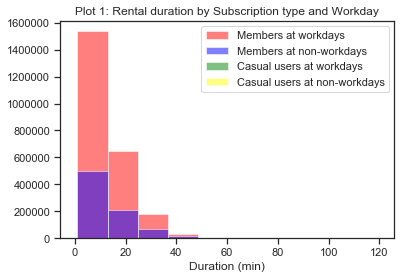

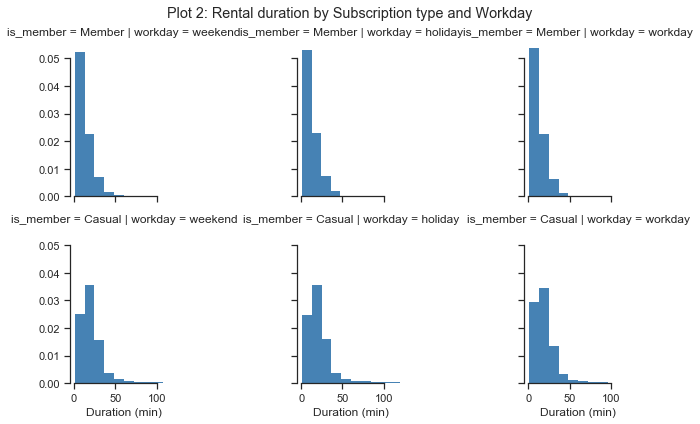

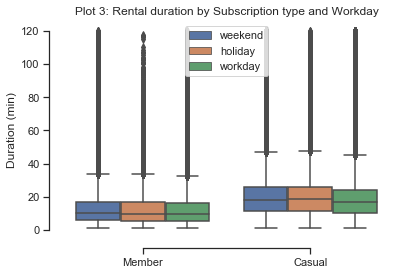

In [50]:
# creating variable for the condition to be plotted.
duration_member_workday = ride_data.loc[(ride_data['is_member']=='Member')&(ride_data['workday']=='workday'),'duration_min']
duration_casual_workday = ride_data.loc[(ride_data['is_member']=='Casual User')&(ride_data['workday']=='workday'), 'duration_min']
duration_member_nonworkday = ride_data.loc[(ride_data['is_member']=='Member')&(ride_data['workday']!='workday'),'duration_min']
duration_casual_nonworkday = ride_data.loc[(ride_data['is_member']=='Casual User')&(ride_data['workday']!='workday'),'duration_min']

# Making overlapping histograms.
plt.hist(duration_member_workday, color='red',  alpha=.5,label='Members at workdays')
plt.hist(duration_member_nonworkday, color='blue', alpha=.5,label='Members at non-workdays')
plt.hist(duration_casual_workday, color='green', alpha=.5,label='Casual users at workdays')  
plt.hist(duration_casual_nonworkday, color='yellow', alpha=.5,label='Casual users at non-workdays')
plt.xlabel('Duration (min)')
plt.legend(loc='upper right')
plt.title('Plot 1: Rental duration by Subscription type and Workday')
plt.show()

# Showing the histograms in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(ride_data, row="is_member", col="workday")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "duration_min", color="steelblue",  lw=0, density=True)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9, wspace=1.1)
# Making a more informative axis name.
g.set_axis_labels('Duration (min)')
plt.suptitle('Plot 2: Rental duration by Subscription type and Workday')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

# Comparing groups using boxplots.
ax = sns.boxplot(x='is_member',y='duration_min',hue='workday',data=ride_data)  
plt.title('Plot 3: Rental duration by Subscription type and Workday')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Duration (min)')
plt.legend(loc='upper center')
plt.show()

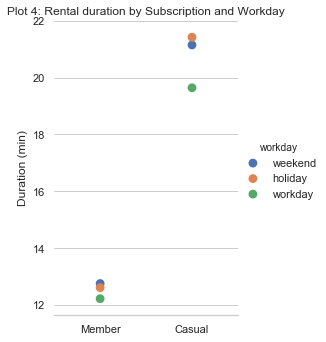

In [59]:
# Comparing groups using pointplots.

# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.catplot(x="is_member", y="duration_min", hue="workday", data=ride_data, kind="point", ci=75, join=False)
g.despine(left=True)
g.set_ylabels('Duration (min)')
g.set_xlabels('')
plt.title('Plot 4: Rental duration by Subscription and Workday')
plt.show()

- plot 1 has too much overlap and due to the big difference in the groups size, some data is not even visible in the plot.
- plot 2 shows more information than plot 1. It is already possible to see that both members and casual users have a skewed rental duration distribution where most rides are shorter than 30 minutes. This is expected since there is an extra fee for rides that take longer than 30 minutes. In addition, there seems to be only slight difference in rental duration distribution when comparing workday, weekends and holidays for both members and casual users, which is surprising.
- plot 3 illustrates the points made about plot 2 more intuitively. There's no significant difference between the different day types and the most trips are shorter than 30 minutes. However, it's easier to see that casual users seem to take longer trips on average. 
- plot 4 shows the same information from plot 3 but with a less distracting visualization. 

## Assignment 1.2
Choose two continuous variables, and plot them three different ways

In [ ]:
# # import data file
# file_path = '/Users/wesamazaizeh/Desktop/Thinkful_Main_Course/googleplaystore.csv'
# app_data = pd.read_csv(file_path, low_memory=False)

# # Remove row with faulty entry for Price ('Everyone' intead of numerical vlaue)
# ind = app_data.index[app_data['Price'].str.match('Everyone')][0]
# app_data.drop(ind, inplace=True)
# # Change price field to numerical values without '$'
# app_data.Price = app_data.Price.replace('[\$,]', '', regex=True).astype(float)

# Basic 2D scatter plot
g = sns.relplot(x='Rating', y='Reviews', hue='Price', data=app_data[:10000])
ax = plt.gca()
g.set_ylabels('Rating')
g.set_xlabels('Number of Reviews')
plt.title('Plot 1: Rating by number of reviews and price')
plt.show()


- plot 1 shows a basic scatter plot comparing rental duration to 

In [48]:
app_data.index[app_data['Price'].str.match('Everyone')][0]

10472

In [46]:
app_data.iloc[10475]

App               Wi-Fi Visualizer
Category                     TOOLS
Rating                         3.9
Reviews                        132
Size                          2.6M
Installs                   50,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                       Tools
Last Updated          May 17, 2017
Current Ver                  0.0.9
Android Ver             2.3 and up
Name: 10475, dtype: object